In [11]:
%matplotlib inline
import re
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from scipy.constants import hbar, e as eV, c
eh = eV/hbar
import glob
def ri(z): return (z.real, z.imag)
#m = re.compile(r"([^_]+)_r([0-9.]+)nm_")
#removek = re.compile(r"(k\([^)]+\)um-1_)")
remover = re.compile(r"r[0-9.]+nm_")

from qpms import lorentz_drude, Particle, ScatteringSystem, EpsMu, EpsMuGenerator, TMatrixGenerator, BaseSpec, eV, hbar
eh = eV/hbar
import numpy as np

In [2]:
allfiles=glob.glob('*cyl*k(0_0)*.npz')
allgraphs=dict()
for f in allfiles:
    base = remover.sub('', f)
    if base in allgraphs.keys():
        allgraphs[base] += 1
    else:
        allgraphs[base] = 1
for k in sorted(allgraphs.keys()):
    print(k, allgraphs[k])

cyl_h50nm_p580nmx580nm_mAu_n1.52_b+2_k(0_0)um-1_L3_cn410.npz 80
cyl_h50nm_p580nmx580nm_mAu_n1.52_b-2_k(0_0)um-1_L3_cn202.npz 139
cyl_h50nm_p580nmx580nm_mAu_n1.52_b-2_k(0_0)um-1_L3_cn206.npz 141
cyl_h50nm_p580nmx580nm_mAu_n1.52_b-2_k(0_0)um-1_L3_cn208.npz 141
cyl_h50nm_p580nmx580nm_mAu_n1.52_b-2_k(0_0)um-1_L3_cn210.npz 80
cyl_h50nm_p580nmx580nm_mAu_n1.52_b-2_k(0_0)um-1_L3_cn302.npz 154
cyl_h50nm_p580nmx580nm_mAu_n1.52_b-2_k(0_0)um-1_L3_cn410.npz 129
cyl_h50nm_p580nmx580nm_mAu_n1.52_b-2_k(0_0)um-1_L3_cn416.npz 161


In [43]:
globpattern = '*cyl_r*_h50nm_p580nmx580nm_mAu_n1.52_b?2_k(0_0)um-1_L3_cn???.npz'
filenames=glob.glob(globpattern)
plotfilename = 'collected_' + globpattern.replace('*', 'XXX').replace('?', 'X').replace('npz','pdf')
plotdata = []
print(filenames[:4], plotfilename)
projectors = np.load('projectors_D4h_lMax3.npz')
irlabels = sorted(projectors.keys())
projectors = {f: projectors[f] for f in irlabels}
projectors_list = [projectors[irlabels[i]] for i in range(len(projectors))]
irlabels

['cyl_r117nm_h50nm_p580nmx580nm_mAu_n1.52_b-2_k(0_0)um-1_L3_cn206.npz', 'cyl_r148nm_h50nm_p580nmx580nm_mAu_n1.52_b-2_k(0_0)um-1_L3_cn302.npz', 'cyl_r80nm_h50nm_p580nmx580nm_mAu_n1.52_b-2_k(0_0)um-1_L3_cn206.npz', 'cyl_r74nm_h50nm_p580nmx580nm_mAu_n1.52_b-2_k(0_0)um-1_L3_cn206.npz'] collected_XXXcyl_rXXX_h50nm_p580nmx580nm_mAu_n1.52_bX2_k(0_0)um-1_L3_cnXXX.pdf


["A1'", "A1''", "A2'", "A2''", "B1'", "B1''", "B2'", "B2''", "E'", "E''"]

In [44]:
#projectors
#glob.glob('cyl_r100nm*L3*3100.npz')
#glob.glob('sph_r100*m5*.npz')
#dat['meta'][()],list(dat.keys())

In [45]:
for file in filenames:
    dat = np.load(file, allow_pickle=True)
    kx = dat['meta'][()]['k'][0]
    radius = dat['meta'][()]['radius']
    b = dat['meta'][()]['band_index']
    eigvals = dat['eigval']
    lMax = dat['meta'][()]['lMax']
    residuals = dat['residuals']
    ef =dat['empty_freqs']
    eigvecs = dat['eigvec']
    irweights = np.array([np.linalg.norm(np.tensordot(proj, eigvecs, axes=(-1, -1)), axis=0,ord=2) for proj in projectors_list]).T
    irclass = np.argmax(irweights, axis=-1)
    #purities = np.amax(irweights, axis=-1)
    #print(purities)
    
    #for i in range(len(residuals)): 
    #    if residuals[i] < 0.01:
    #        vec = eigvecs[i]
    #        for irlabel, proj in projectors.items():
    #            print(irlabel, np.linalg.norm(np.dot(proj, vec))) #maybe some conj() here?
    #        print('--->', irlabels[irclass[i]])

    
    plotdata.append((radius, eigvals, residuals, b, ef, irclass, eigvecs))

markerdict = {
    4: "3",
    -4: "4",
    3: "^",
    -3: "v",
    -2: 'x',
    2: '+',
    1: 's',
    -1: 'd',
}

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
colordict = {i: colors[(i+1)] for i in range(-4,8)}

def markerfun(b):
    if b in markerdict.keys():
        return markerdict[b]
    else: return 'X'

def colorfun(b):
    if (b+1) in colordict.keys():
        return colordict[b+1]
    else: return colordict[0]

collected_XXXcyl_rXXX_h50nm_p580nmx580nm_mAu_n1.52_bX2_k(0_0)um-1_L3_cnXXX.pdf


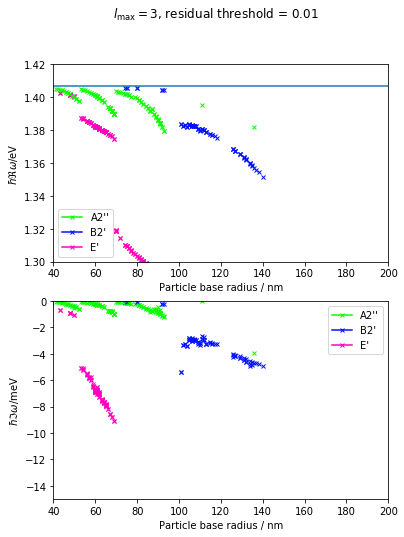

In [46]:
fig = plt.figure(figsize=(6,8))
ax = fig.add_subplot(211)

res_thr = 0.01
xlim = [40,200]
plot_irreps = None #{"E''"}


plot_iris=set(range(len(irlabels))) if plot_irreps is None else {iri for iri in range(len(irlabels)) if irlabels[iri] in plot_irreps}

ir_labeled=set()
for (radius, eigvals, residuals, b, ef, irclass, eigvecs) in plotdata:
    for i, (e, res, iri) in enumerate(zip(eigvals, residuals, irclass)):
        #if i == 0:
        if iri in plot_iris and res < res_thr:# and e.real < 2.14e15:
            if iri in ir_labeled: 
                label=None
            else:
                ir_labeled.add(iri)
                label=irlabels[iri]
            ax.plot(radius*1e9, e.real/eh, marker=markerfun(b)
                    , ms=4, #c=colorfun(b)
                    c=matplotlib.cm.hsv(iri/9),
                    #c = colorfun(iri),
                    label=label,
                   )
            #print(kx, abs(e.imag/e.real), res, b)
for eff in ef:
    ax.axhline(y= eff/eh)
ax.set_xlabel("Particle base radius / nm")
ax.set_ylabel('$\hbar \Re \omega / \mathrm{eV}$')
#ax.set_ylim([2.075e15,2.085e15])
ax.set_ylim([1.30, 1.42])
ax.set_xlim(xlim)

#ax.set_xlim([40,100])
ax.legend()

ax = fig.add_subplot(212)
ir_labeled=set()
for (radius, eigvals, residuals, b, ef, irclass, eigvecs) in plotdata:
    for i, (e, res, iri) in enumerate(zip(eigvals, residuals, irclass)):
        #if i==0:
        if iri in plot_iris and res < res_thr:# and e.real < 2.14e15:
            if iri in ir_labeled: 
                label=None
            else:
                ir_labeled.add(iri)
                label=irlabels[iri]
            ax.plot(radius*1e9, e.imag/eh*1000, 
                    #marker='x', 
                    #c=colorfun(b), 
                    c=matplotlib.cm.hsv(iri/9),#colorfun(iri),
                    marker=markerfun(b), ms=4,
                    label=label
                   )
            #print(kx, abs(e.imag/e.real), res, b)
ax.set_ylim([-15,0])
ax.set_xlim(xlim)
ax.set_xlabel("Particle base radius / nm")
ax.legend()
ax.set_ylabel('$\hbar \Im \omega / \mathrm{meV}$')
fig.suptitle('$l_\mathrm{max}=%d$, residual threshold = %g' % (lMax, res_thr) )
#fig.savefig(plotfilename)
#fig.savefig(plotfilename.replace('pdf', 'png'))
print(plotfilename)

In [48]:
from itertools import groupby

def nearby_groups(arr, tol_digits=4):
  # split up sorted input array into groups if they're similar enough
  for (_, grp) in groupby(arr, lambda x: round(x, tol_digits)):
    # yield value from group that is closest to an integer
    yield sorted(grp, key=lambda x: abs(round(x) - x))[0]

In [49]:
for r in (50e-9, 55e-9, 60e-9, 65e-9, 70e-9, 75e-9, 80e-9, 85e-9, 90e-9, 95e-9, 100e-9): #plotdata.keys():
    for (radius, eigvals, residuals, b, ef, irclass, eigvec) in plotdata:
        if radius == r:
            print(r, eigvals/eh, residuals, irclass)
            #print('--------------------------------------')

5e-08 [1.39986245-0.00050337j 1.40082405-0.00092111j 1.40079787-0.00087516j] [0.00920158 0.0120017  0.03328261] [3 8 8]
5e-08 [1.39987005-0.00040724j 1.40081982-0.00107462j 1.40081996-0.00108061j] [0.00211249 0.00711883 0.00757332] [3 8 8]
5e-08 [1.39988085-0.00040689j 1.40075638-0.00106582j 1.40075199-0.00107753j] [0.00311393 0.01200387 0.01290731] [3 8 8]
5.5e-08 [1.3853171 -5.49789605e-03j 1.38531714-5.54326866e-03j 1.40387602-8.70249675e-05j] [0.02648181 0.02696851 0.02072843] [8 8 3]
5.5e-08 [1.38594655-5.48591517e-03j 1.38594809-5.49300952e-03j 1.40387335-8.73709403e-05j] [0.01071835 0.01087211 0.00259913] [8 8 3]
5.5e-08 [1.38542816-0.00579787j 1.38542475-0.00579661j] [0.03272557 0.02835727] [8 8]
6e-08 [1.38204978-0.00685636j 1.38204971-0.00685827j 1.39940744-0.00156442j] [0.00488569 0.00426737 0.17602708] [8 8 3]
6e-08 [1.38214079-0.00684155j 1.38215069-0.00685085j 1.40104968-0.00023977j] [0.00656508 0.00683143 0.00832426] [8 8 3]
6e-08 [1.3821597 -0.00688859j 1.38216997-0.006

In [50]:
plot_irreps={"E''", "B1'"}
plot_iris=set(range(len(irlabels))) if plot_irreps is None else {iri for iri in range(len(irlabels)) if irlabels[iri] in plot_irreps}

In [58]:
bg = EpsMuGenerator(EpsMu(1.52**2))
fg = EpsMuGenerator(lorentz_drude['Au'])
bspec = BaseSpec(lMax=3)
defomega = 1.4*eh
Ms = []
Mi = 0
for r in (50e-9, 55e-9, 60e-9, 65e-9, 70e-9, 75e-9, 80e-9, 85e-9, 90e-9, 95e-9, 100e-9): #plotdata.keys():
    tmg = TMatrixGenerator.cylinder(bg, fg, r = r, h = 50e-9)
    ss, ssw = ScatteringSystem.create([Particle([0,0,0], tmg, bspec)], bg, omega=defomega, latticebasis=[[580e-9, 0, 0], [0, 580e-9, 0]])
    for (radius, eigvals, residuals, b, ef, irclass, eigvecs) in plotdata:
        if radius == r:
            print(r, eigvals/eh, residuals, irclass)
            for i, eig in enumerate(eigvals):
                ssw = ss(eig)
                M= ssw.modeproblem_matrix_full((0,0,0))
                Ms.append(M)
                print(Mi, np.linalg.svd(M, compute_uv=False)[-1], np.linalg.norm(np.dot(M, eigvecs[i])))
                Mi += 1
            print('--------------------------------------')

5e-08 [1.39986245-0.00050337j 1.40082405-0.00092111j 1.40079787-0.00087516j] [0.00920158 0.0120017  0.03328261] [3 8 8]
0 0.07212833428390265 0.1291260489384942
1 0.02574359963913394 0.051923363216646715
2 0.027042357376628127 0.05685455757628272
--------------------------------------
5e-08 [1.39987005-0.00040724j 1.40081982-0.00107462j 1.40081996-0.00108061j] [0.00211249 0.00711883 0.00757332] [3 8 8]
3 0.07317537433455489 0.12738416980000883
4 0.027151753447327266 0.05427141515576546
5 0.027233454277507334 0.05444442471899654
--------------------------------------
5e-08 [1.39988085-0.00040689j 1.40075638-0.00106582j 1.40075199-0.00107753j] [0.00311393 0.01200387 0.01290731] [3 8 8]
6 0.07274239543778367 0.1265488306934946
7 0.029916679728109904 0.05991596553199234
8 0.030263548102729496 0.06065346958801753
--------------------------------------
5.5e-08 [1.3853171 -5.49789605e-03j 1.38531714-5.54326866e-03j 1.40387602-8.70249675e-05j] [0.02648181 0.02696851 0.02072843] [8 8 3]
9 0.027

83 0.18891577268056162 0.23539495170148952
84 0.41784422721676334 2.645671340131812
--------------------------------------
7.5e-08 [1.3964901 -1.50796870e-03j 1.40160361-1.21960275e-04j 1.405585  -7.04666215e-05j] [0.39083587 0.00724647 0.00919627] [3 3 6]
85 0.14247170111480056 0.5567081982816228
86 0.23807062336932672 0.2880429135925758
87 0.41372180477436615 2.689407996389923
--------------------------------------
7.5e-08 [1.40169408-1.10745508e-04j 1.40558518-7.05776172e-05j] [0.00484103 0.00477905] [3 6]
88 0.23083356189411652 0.28027498901925757
89 0.4136833506895342 2.6898940622530074
--------------------------------------
7.5e-08 [] [] []
--------------------------------------
7.5e-08 [1.30944419-0.02552091j 1.30944416-0.02552191j 1.40162384-0.0001201j  1.40551705-0.00011554j] [0.01840726 0.01859058 0.05223126 0.15795048] [8 8 3 6]
90 0.038332923889674145 0.06750043719430365
91 0.03833200276996983 0.0675523131452658
92 0.23646284546033214 0.29055055345566844
93 0.40929688538021

165 0.012415515950469202 0.01871732139773623
166 0.012415515945978901 0.018717321390244467
167 0.3974937207426856 0.4900612558173071
168 0.40008785190771434 1.2968823907909341
--------------------------------------
9e-08 [1.29162985-3.28000996e-02j 1.29113283-3.34882339e-02j 1.32426805-3.35492468e-02j 1.32559134-3.22717900e-02j 1.38631631-1.00278618e-03j 1.40404136+9.98355648e-05j] [0.02013059 0.02641861 0.41031872 0.44797982 0.01109988 0.123613  ] [8 8 8 8 3 6]
169 0.03020599400222289 0.051863348793701074
170 0.03448937399778162 0.060616559104639624
171 0.1571260636803333 0.400518385449174
172 0.1635874242183004 0.4408180541952159
173 0.390725056364449 0.4849747349364518
174 0.39415065428280616 1.2872048100510305
--------------------------------------
9e-08 [1.38596342-0.00077759j 1.40427136-0.00020741j] [0.0039787  0.05404083] [3 6]
175 0.3983417253608725 0.49069332328856113
176 0.41710301188956583 1.409709721087491
--------------------------------------
9.5e-08 [1.37665259-0.0016485

In [59]:
Ms[0]

array([[ 1.30451974e-01-2.96604988e-02j, -3.74187911e-34+1.74028992e-34j, -1.14154607e-17+5.18995390e-17j,  2.84046256e-17+5.33426612e-17j,  4.21400015e-16-7.68607542e-18j,
         8.09331508e-18-7.85202031e-18j, -7.04455027e-35-5.30487732e-34j, -7.82316921e-17-1.35281468e-16j, -2.14379226e-17+7.59409933e-17j,  1.18623350e-33-8.40609004e-33j,
        -3.96884148e-01-1.08682835e-02j,  2.06049519e-32-1.84093863e-32j,  2.12708265e-17+7.85192708e-18j,  5.35105155e-34+9.09552951e-34j,  1.18516865e+00+2.39201707e-01j,
         4.57110001e-17+3.55022830e-16j, -2.70731026e-19-3.87977151e-19j,  2.20069363e-32+1.23826817e-33j,  1.99911393e-32-1.51419464e-32j, -1.45529908e-01+1.01811212e+00j,
        -3.76667589e-33-2.98425589e-33j,  4.07090069e-19-9.71409017e-20j, -5.03553067e-32+4.08114525e-32j,  3.24507177e-32+3.80964401e-33j,  2.00879532e-17+5.91383490e-18j,
         2.19295372e-17+1.64139719e-16j,  3.62239598e-17+5.67461442e-17j,  1.83735773e-33-9.25152132e-33j, -5.73845516e-19+4.51104090e-

In [ ]:
type(plotdata)

In [12]:
dat['meta']

array({'period': (5.8e-07, 5.8e-07), 'refractive_index': 1.52, 'material': 'Au', 'radius': 4.4e-08, 'height': 5e-08, 'lMax_extend': 10, 'lMax': 3, 'k': [0.0, 0.0], 'kpi': True, 'rank_tol': None, 'output': None, 'rank_tolerance': 100000000000.0, 'min_candidates': 1, 'residual_tolerance': 0.3, 'band_index': -2, 'interval_factor': 0.05, 'N': 410, 'imaginary_aspect_ratio': 0.8, 'plot_out': None, 'plot': False, 'basis_vectors': [(5.8e-07, 0.0), (0.0, 5.8e-07)]},
      dtype=object)

In [18]:
list(dat.keys())

['meta',
 'empty_freqs',
 'eigval',
 'eigval_inside_metric',
 'eigvec',
 'residuals',
 'eigval_err',
 'ranktest_SV',
 'iri',
 'blochvector',
 'inside_contour',
 'refractive_index_internal']

In [60]:
import os, sys

In [61]:
os.getcwd()

'/home/mmn/tmp/sq-tommi-inf'